In [49]:
#dementia

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

dementia = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\dementia.csv')

In [50]:
dementia.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL'],
      dtype='object')

In [46]:
dementia['GENDER'].value_counts()

GENDER
0    3706
1    3102
Name: count, dtype: int64

In [47]:
dementia['LAST_ADMISSION_LENGTH'].describe()

count    6808.000000
mean        9.813014
std         9.942223
min         0.000000
25%         4.000000
50%         7.000000
75%        12.000000
max       164.000000
Name: LAST_ADMISSION_LENGTH, dtype: float64

In [51]:
import pandas as pd

df_alzheimer = dementia[dementia['DEMENTIA'] == 1]
df_no_alzheimer = dementia[dementia['DEMENTIA'] == 0]

df_no_alzheimer_sampled = pd.DataFrame()

for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):
 
    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)]
    
    if len(matched_controls) > len(group):
        matched_controls = matched_controls.sample(n=len(group), random_state=42)
    
    df_no_alzheimer_sampled = pd.concat([df_no_alzheimer_sampled, matched_controls])

dementia = pd.concat([df_alzheimer, df_no_alzheimer_sampled])

In [52]:
dementia['DEMENTIA'].value_counts()

DEMENTIA
1    3404
0    3404
Name: count, dtype: int64

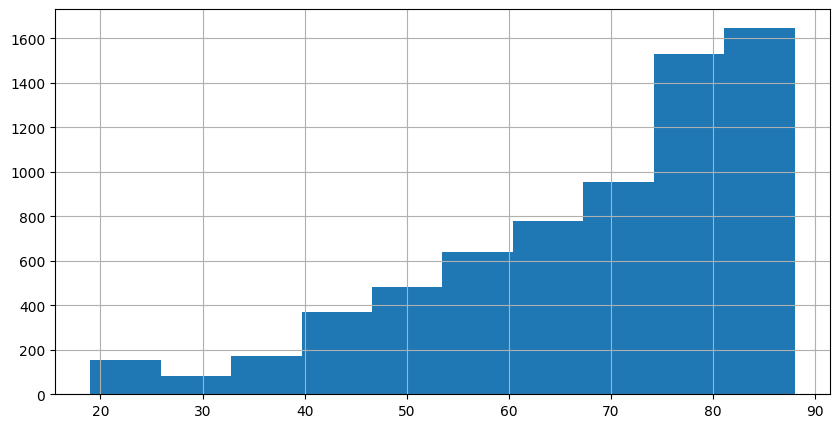

In [7]:
dementia['AGE'].hist(bins=10, figsize=(10, 5))
plt.show()

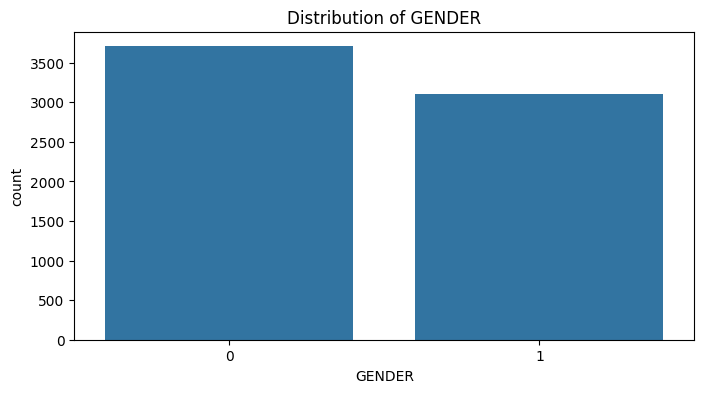

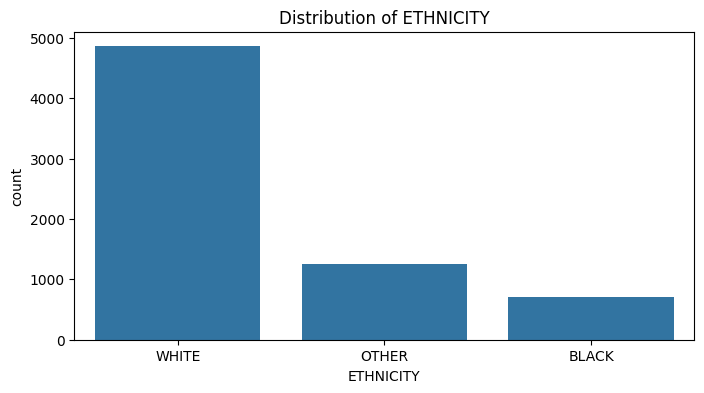

In [54]:
categorical_cols = ['GENDER', 'ETHNICITY']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=dementia, order=dementia[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    
    plt.show()

In [9]:
dementia.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL'],
      dtype='object')

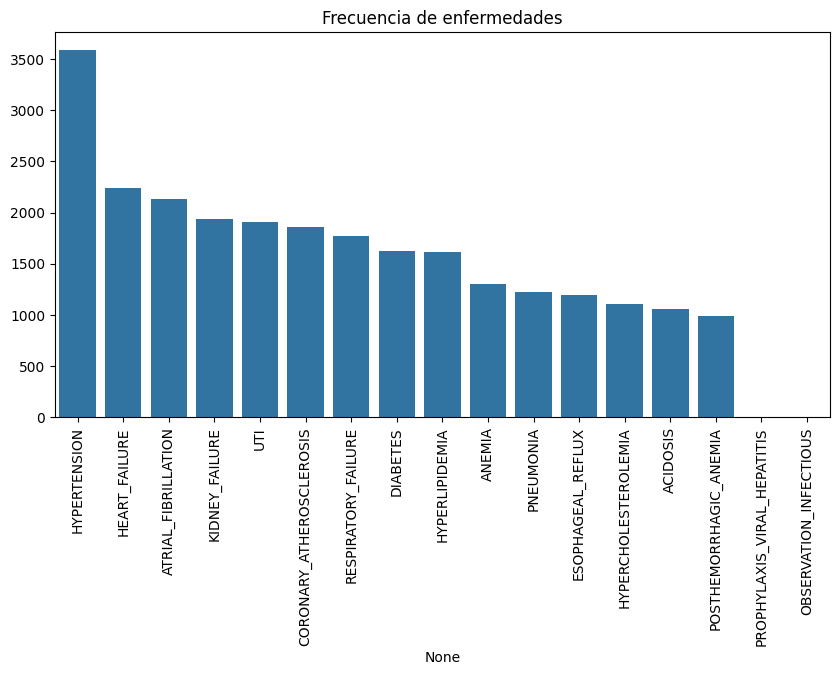

In [10]:
disease_cols = ['HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS']
disease_counts = dementia[disease_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de enfermedades")
plt.show()

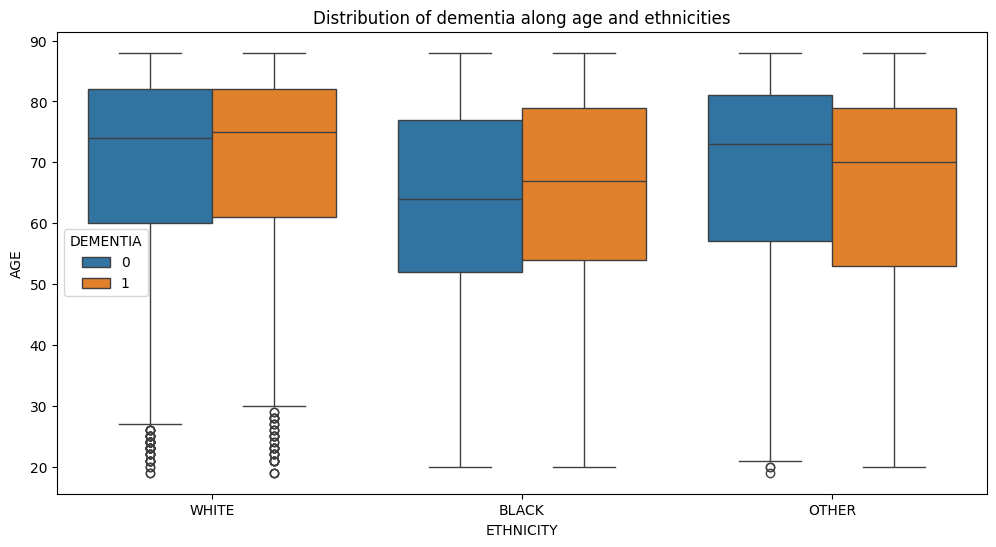

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ETHNICITY', y='AGE', hue='DEMENTIA', data=dementia)
plt.title("Distribution of dementia along age and ethnicities")
plt.show()

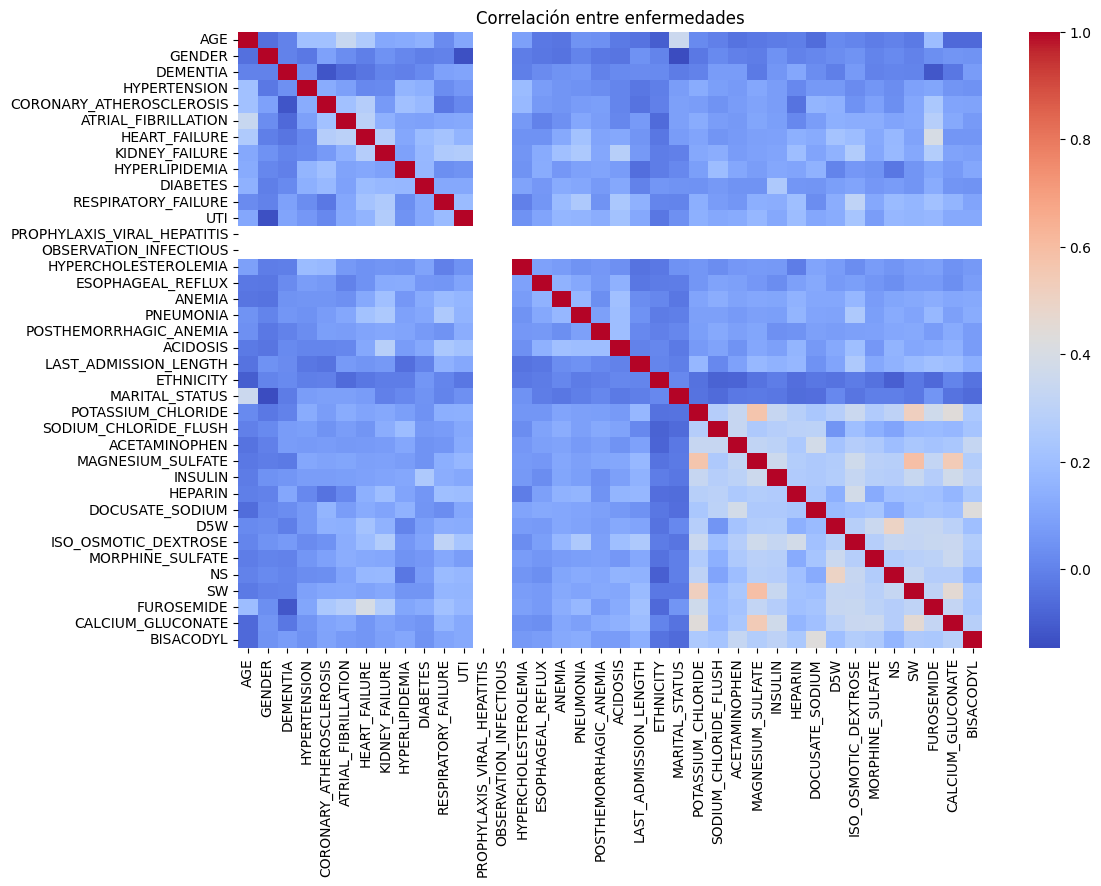

In [12]:
dementia['ETHNICITY'] = dementia['ETHNICITY'].map({'WHITE': 0, 'BLACK': 1, 'OTHER': 2})
dementia['MARITAL_STATUS'] = dementia['MARITAL_STATUS'].map({'UNMARRIED': 0, 'MARRIED': 1, 'OTHER': 2})

cols = ['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL']

plt.figure(figsize=(12, 8))
corr = dementia[cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlación entre enfermedades")
plt.show()

In [56]:
# alzheimer

alzheimer = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\alzheimer.csv')

In [57]:
alzheimer['ALZHEIMER'].value_counts()

ALZHEIMER
0    47630
1      519
Name: count, dtype: int64

In [58]:
import pandas as pd

df_alzheimer = alzheimer[alzheimer['ALZHEIMER'] == 1]
df_no_alzheimer = alzheimer[alzheimer['ALZHEIMER'] == 0]

df_no_alzheimer_sampled = pd.DataFrame()

for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):
 
    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)]
    
    if len(matched_controls) > len(group):
        matched_controls = matched_controls.sample(n=len(group), random_state=42)
    
    df_no_alzheimer_sampled = pd.concat([df_no_alzheimer_sampled, matched_controls])

alzheimer = pd.concat([df_alzheimer, df_no_alzheimer_sampled])

In [59]:
alzheimer['ALZHEIMER'].value_counts()

ALZHEIMER
1    519
0    519
Name: count, dtype: int64

In [61]:
alzheimer['GENDER'].value_counts()

GENDER
0    586
1    452
Name: count, dtype: int64

In [64]:
alzheimer['LAST_ADMISSION_LENGTH'].describe()

count    1038.000000
mean        9.267823
std         8.255651
min         0.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        84.000000
Name: LAST_ADMISSION_LENGTH, dtype: float64

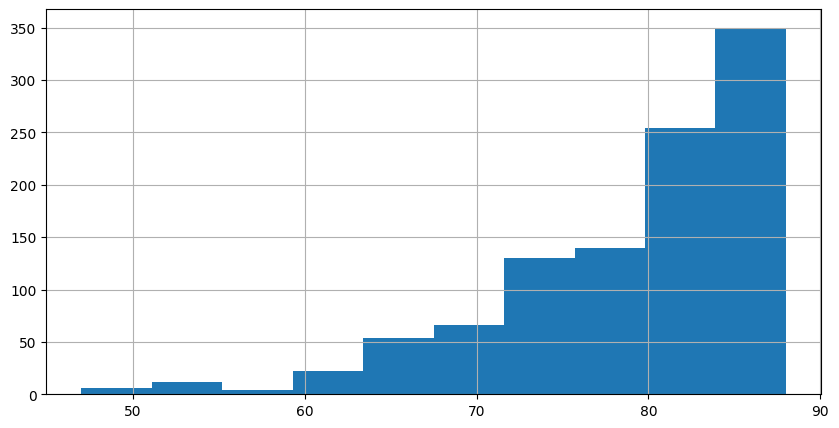

In [17]:
alzheimer['AGE'].hist(bins=10, figsize=(10, 5))
plt.show()

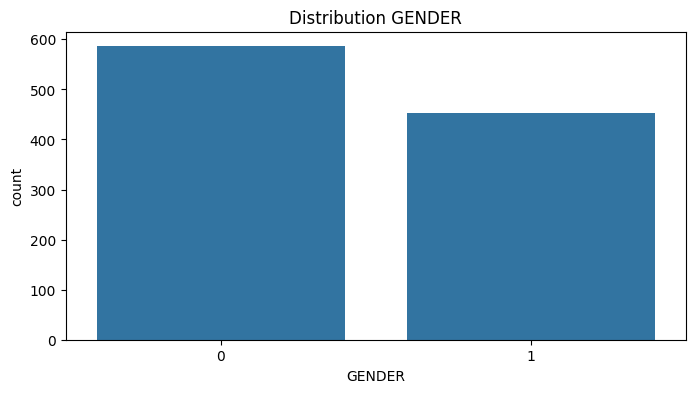

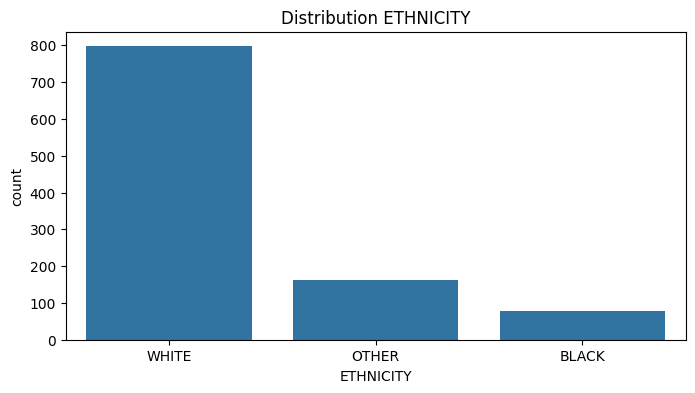

In [66]:
categorical_cols = ['GENDER', 'ETHNICITY']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=alzheimer, order=alzheimer[col].value_counts().index)
    plt.title(f"Distribution {col}")
  
    plt.show()

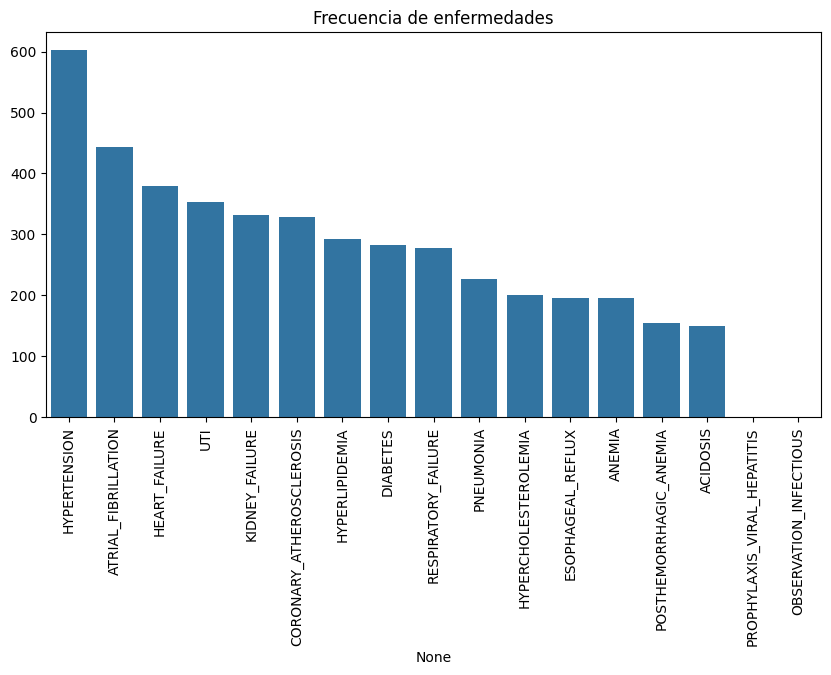

In [19]:
disease_cols = ['HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS']
disease_counts = alzheimer[disease_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de enfermedades")
plt.show()

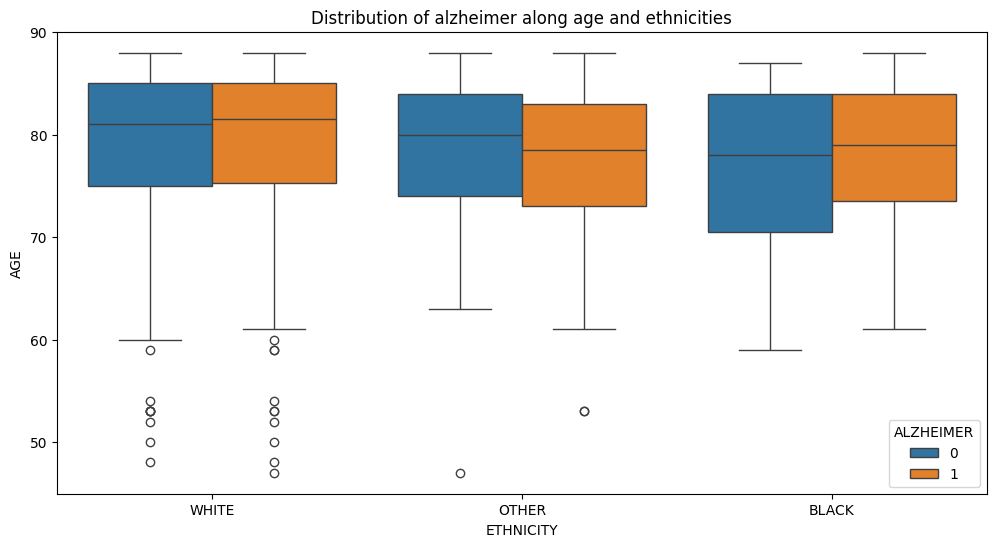

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ETHNICITY', y='AGE', hue='ALZHEIMER', data=alzheimer)

plt.title("Distribution of alzheimer along age and ethnicities")
plt.show()

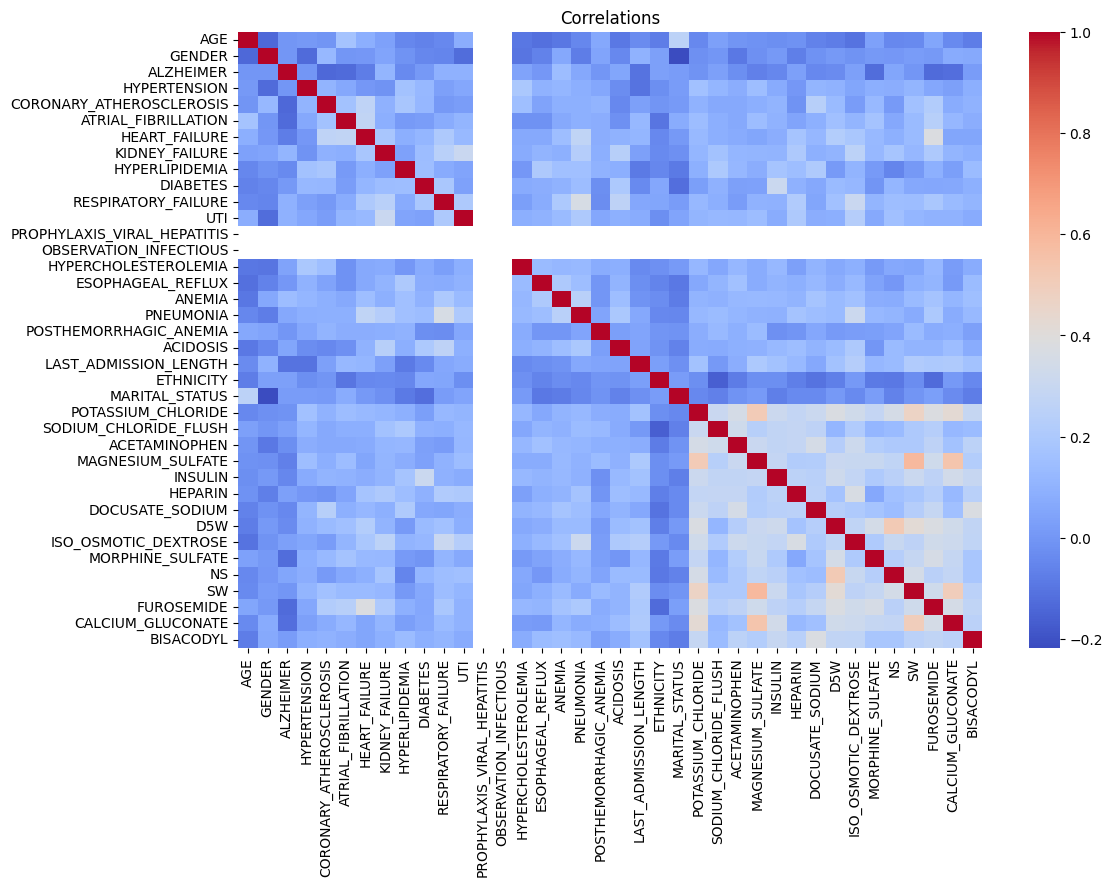

In [69]:
alzheimer['ETHNICITY'] = alzheimer['ETHNICITY'].map({'WHITE': 0, 'BLACK': 1, 'OTHER': 2})
alzheimer['MARITAL_STATUS'] = alzheimer['MARITAL_STATUS'].map({'UNMARRIED': 0, 'MARRIED': 1, 'OTHER': 2})

cols = ['AGE', 'GENDER', 'ALZHEIMER', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL']

plt.figure(figsize=(12, 8))
corr = alzheimer[cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlations")
plt.show()

In [74]:
# vital signs

vitalsigns = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\vitalsigns.csv')


df_alzheimer = vitalsigns[vitalsigns['DEMENTIA'] == 1]
df_no_alzheimer = vitalsigns[vitalsigns['DEMENTIA'] == 0]

df_no_alzheimer_sampled = pd.DataFrame()

for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):
 
    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)]
    
    if len(matched_controls) > len(group):
        matched_controls = matched_controls.sample(n=len(group), random_state=42)
    
    df_no_alzheimer_sampled = pd.concat([df_no_alzheimer_sampled, matched_controls])

vitalsigns = pd.concat([df_alzheimer, df_no_alzheimer_sampled])

In [78]:
vitalsigns.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL', 'HEART_RATE', 'RESPIRATORY_RATE', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'MEAN_BP', 'OXYGEN_SATURATION'],
      dtype='object')

In [85]:
vitalsigns['OXYGEN_SATURATION'].describe()

count     69.000000
mean      99.710145
std        0.876179
min       95.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: OXYGEN_SATURATION, dtype: float64

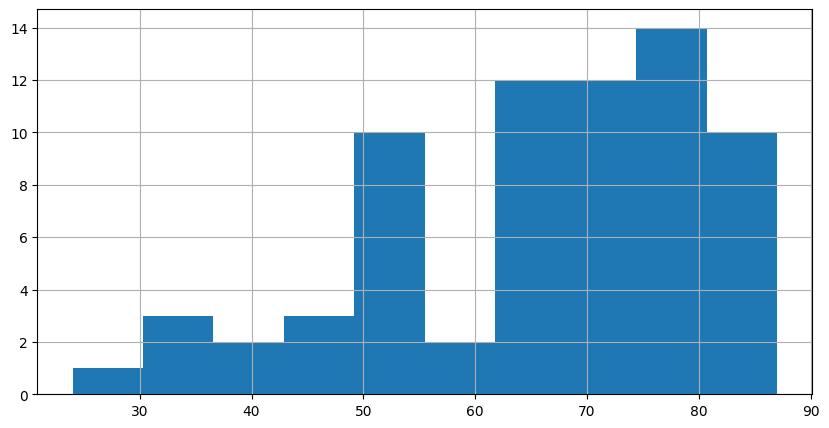

In [24]:
vitalsigns['AGE'].hist(bins=10, figsize=(10, 5))
plt.show()

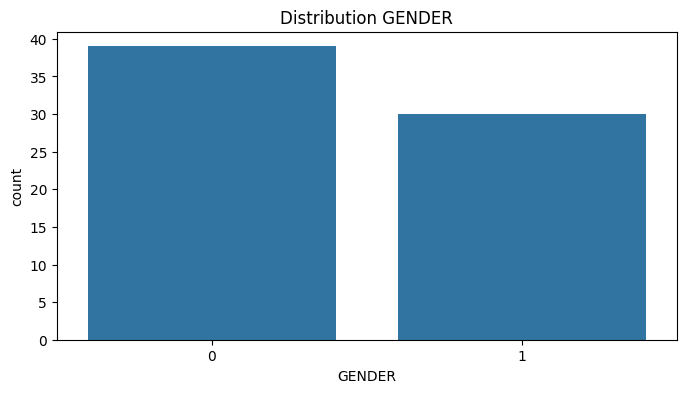

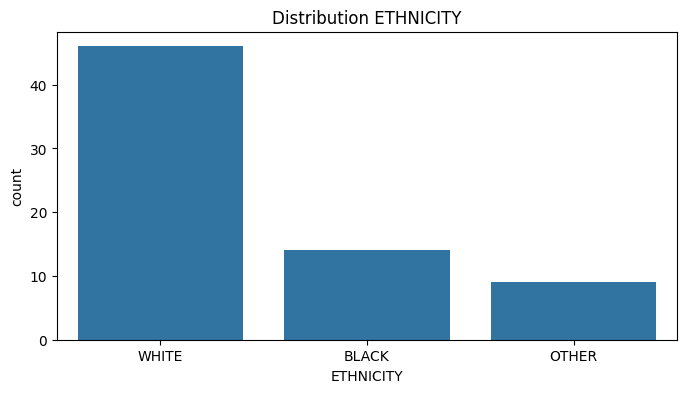

In [86]:
categorical_cols = ['GENDER', 'ETHNICITY']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=vitalsigns, order=vitalsigns[col].value_counts().index)
    plt.title(f"Distribution {col}")
   
    plt.show()

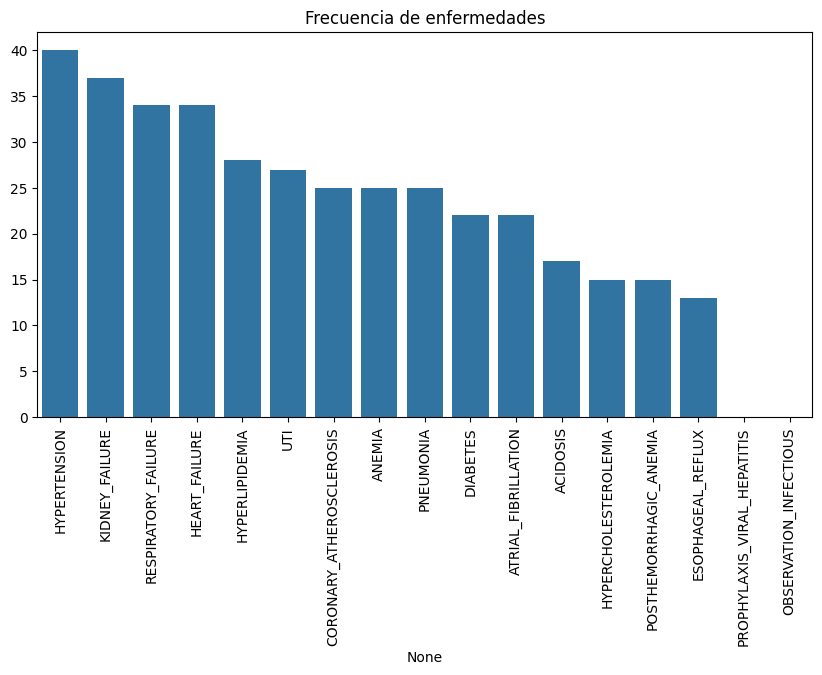

In [26]:
disease_cols = ['HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS']
disease_counts = vitalsigns[disease_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de enfermedades")
plt.show()

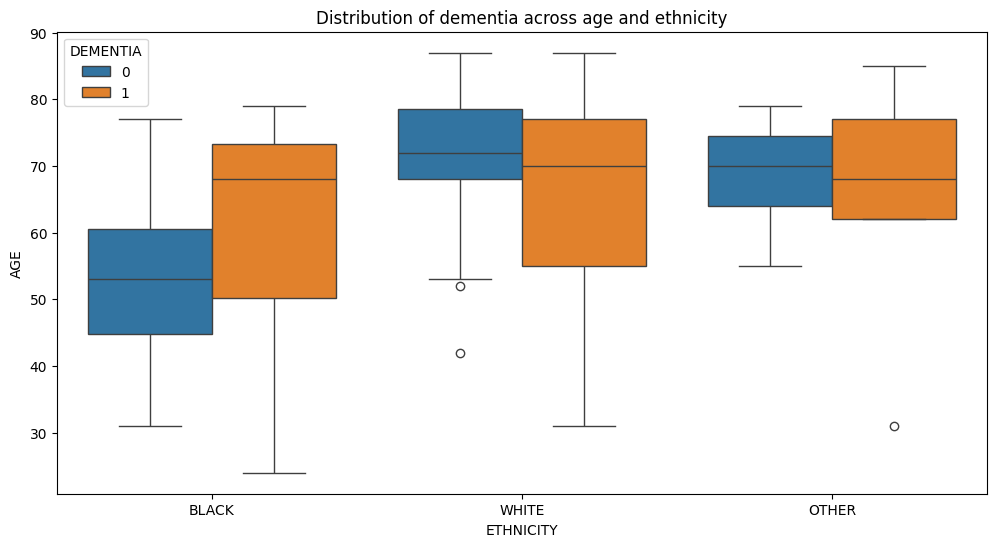

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ETHNICITY', y='AGE', hue='DEMENTIA', data=vitalsigns)

plt.title("Distribution of dementia across age and ethnicity")
plt.show()

In [28]:
vitalsigns.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL', 'HEART_RATE', 'RESPIRATORY_RATE', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'MEAN_BP', 'OXYGEN_SATURATION'],
      dtype='object')

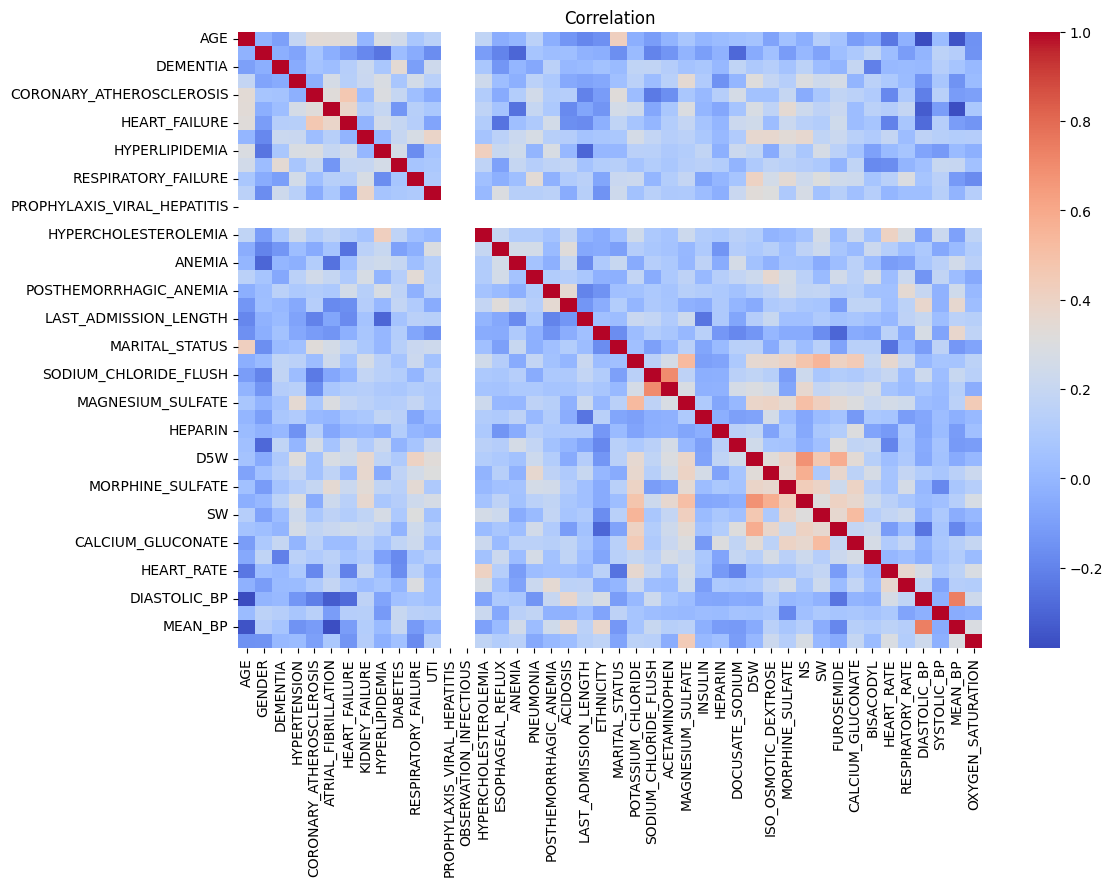

In [89]:
vitalsigns['ETHNICITY'] = vitalsigns['ETHNICITY'].map({'WHITE': 0, 'BLACK': 1, 'OTHER': 2})
vitalsigns['MARITAL_STATUS'] = vitalsigns['MARITAL_STATUS'].map({'UNMARRIED': 0, 'MARRIED': 1, 'OTHER': 2})

cols = ['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL', 'HEART_RATE', 'RESPIRATORY_RATE', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'MEAN_BP', 'OXYGEN_SATURATION']

plt.figure(figsize=(12, 8))
corr = vitalsigns[cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation")
plt.show()

In [30]:
vitalsigns.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL', 'HEART_RATE', 'RESPIRATORY_RATE', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'MEAN_BP', 'OXYGEN_SATURATION'],
      dtype='object')

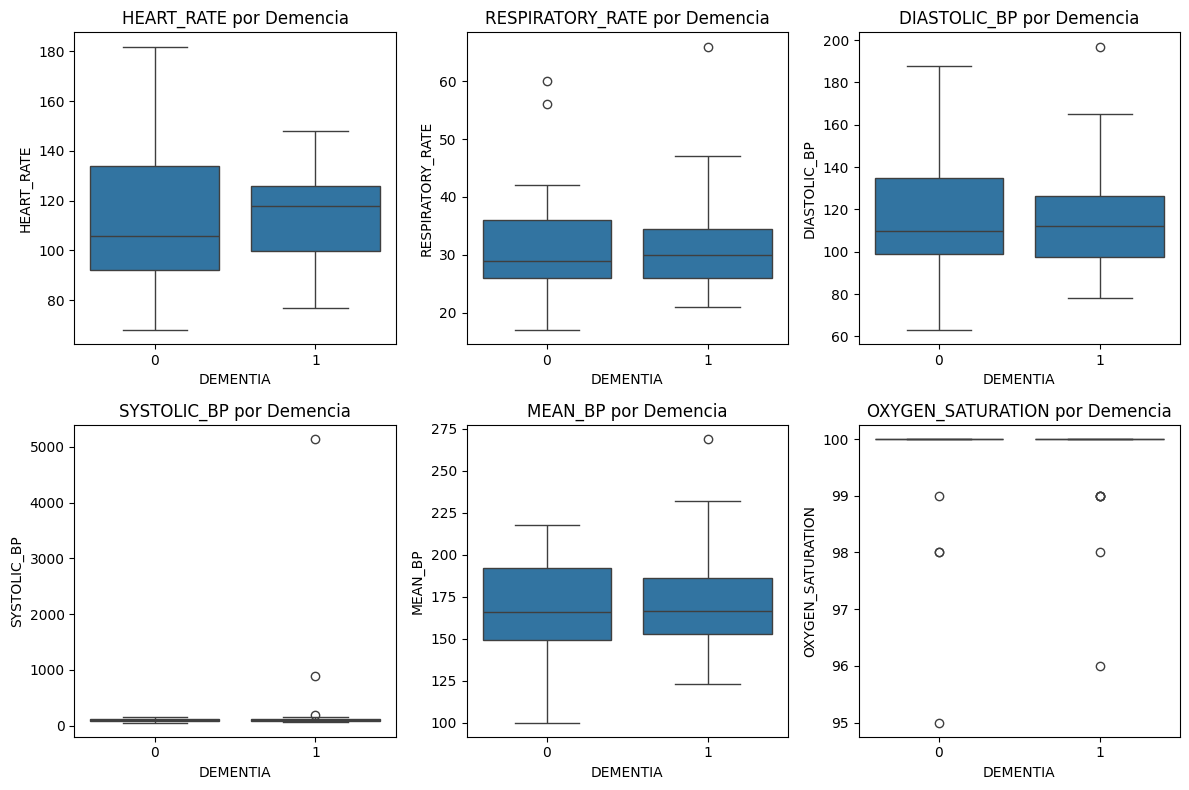

In [31]:
vital_signs = ['HEART_RATE', 'RESPIRATORY_RATE', 'DIASTOLIC_BP', 'SYSTOLIC_BP', 'MEAN_BP', 'OXYGEN_SATURATION']

plt.figure(figsize=(12, 8))
for i, col in enumerate(vital_signs, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=vitalsigns, x='DEMENTIA', y=col)
    plt.title(f'{col} por Demencia')

plt.tight_layout()
plt.show()


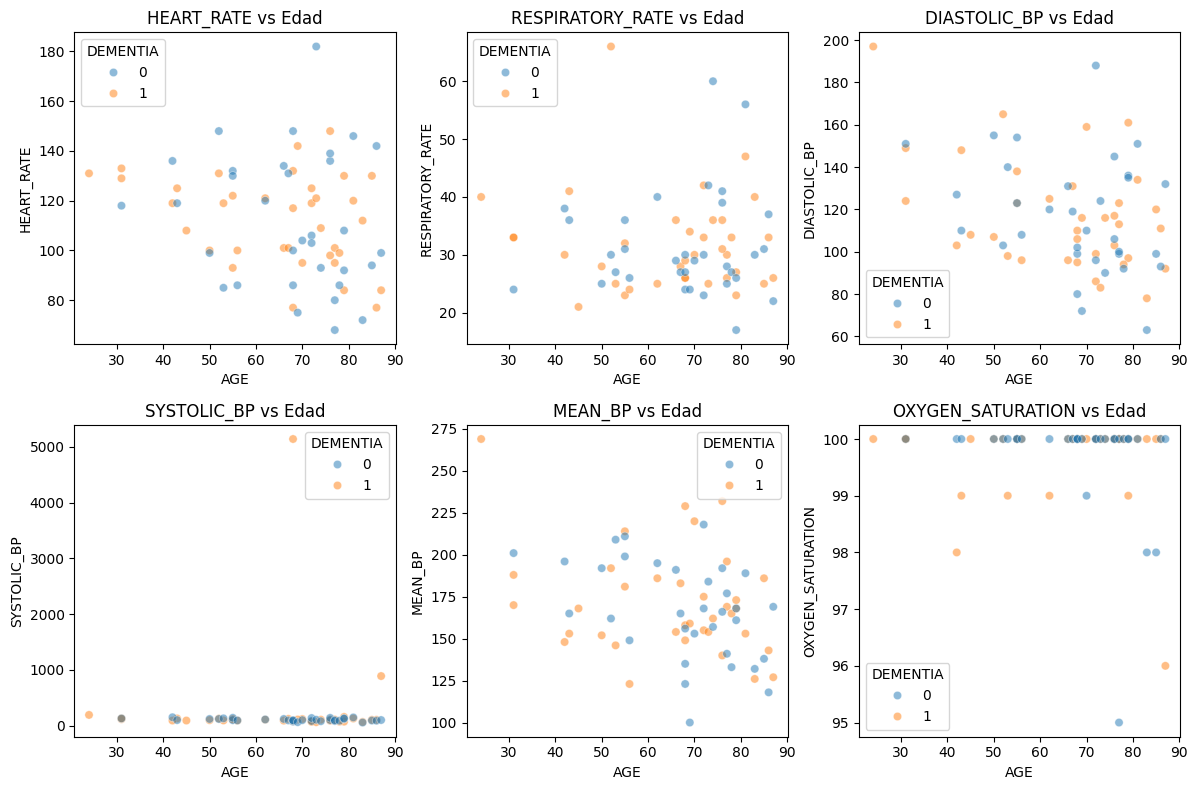

In [32]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(vital_signs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=vitalsigns, x='AGE', y=col, hue='DEMENTIA', alpha=0.5)
    plt.title(f'{col} vs Edad')

plt.tight_layout()
plt.show()


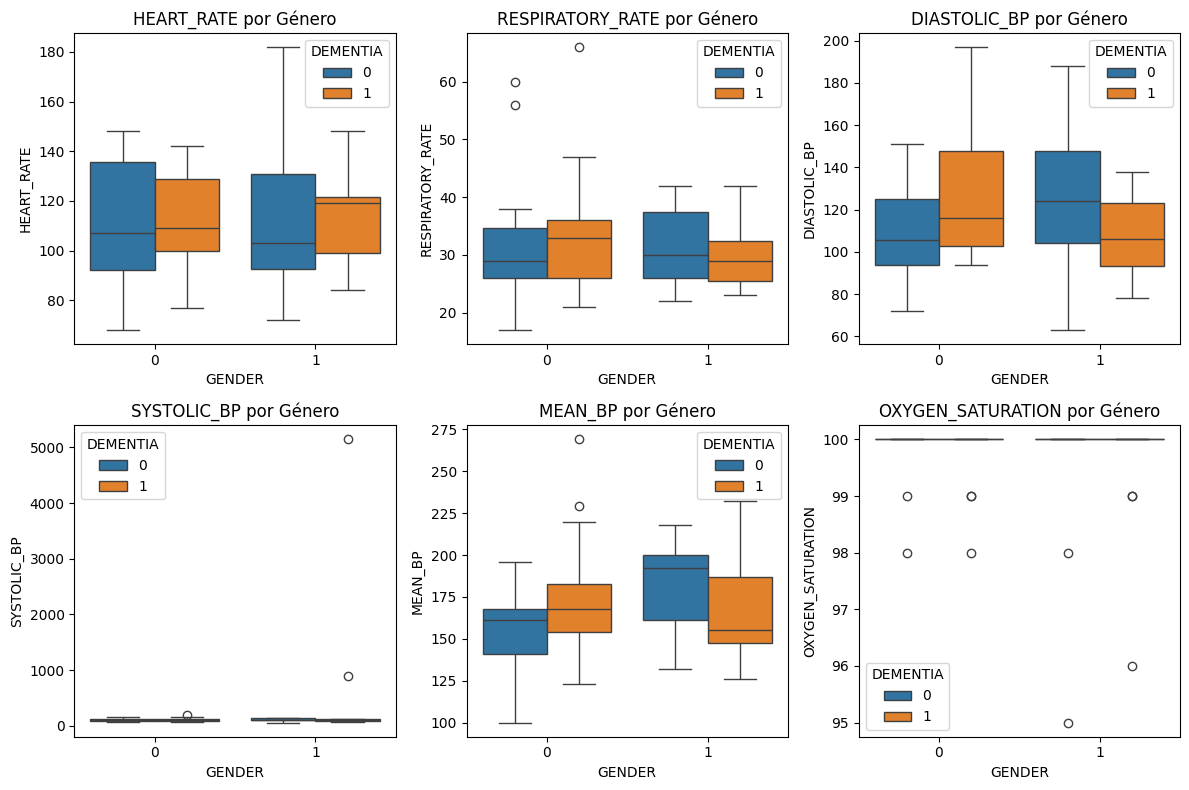

In [33]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(vital_signs, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=vitalsigns, x='GENDER', y=col, hue='DEMENTIA')
    plt.title(f'{col} por Género')

plt.tight_layout()
plt.show()


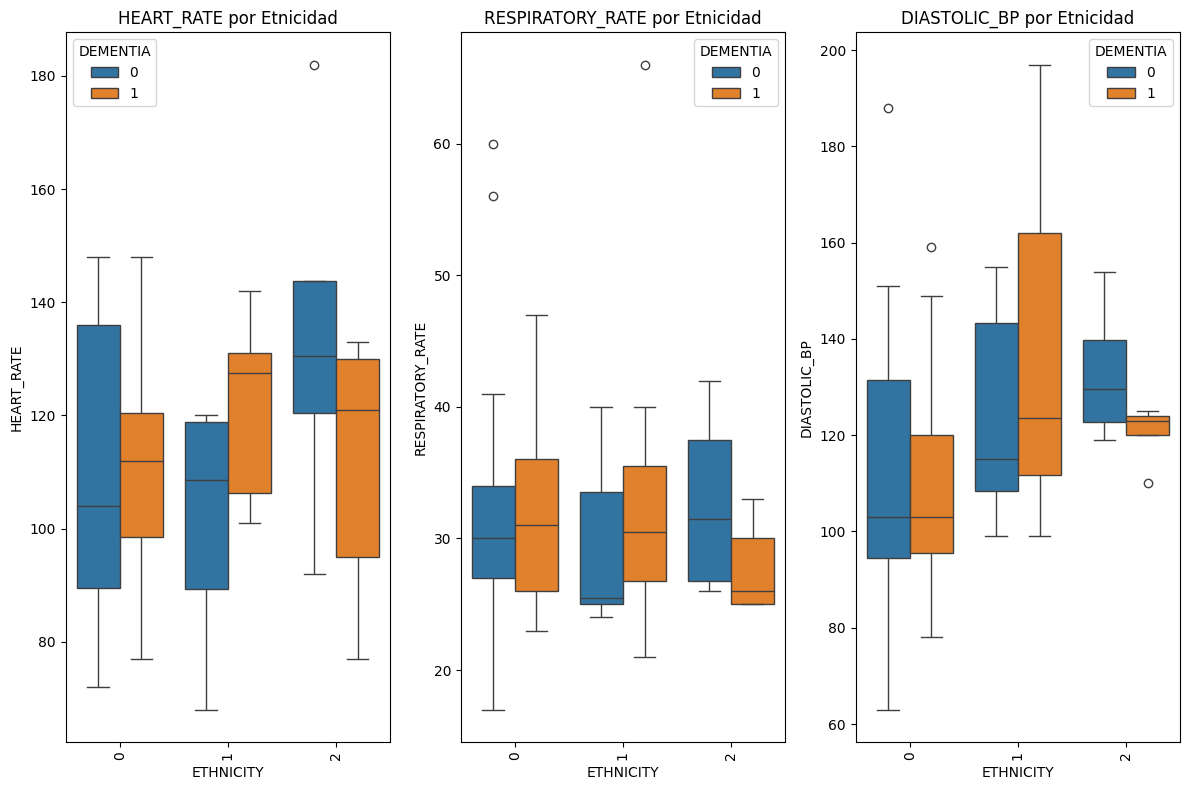

In [34]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(vital_signs[:3], 1):  # Para evitar gráficos sobrecargados
    plt.subplot(1, 3, i)
    sns.boxplot(data=vitalsigns, x='ETHNICITY', y=col, hue='DEMENTIA')
    plt.xticks(rotation=90)
    plt.title(f'{col} por Etnicidad')

plt.tight_layout()
plt.show()


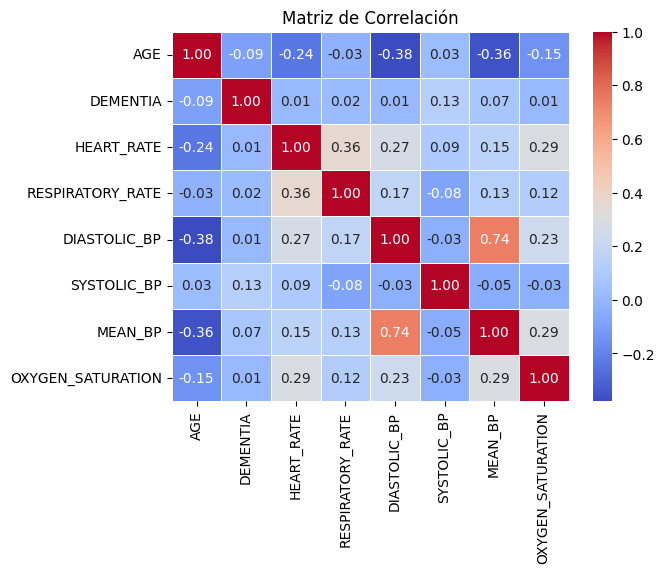

In [35]:
corr_matrix = vitalsigns[['AGE', 'DEMENTIA'] + vital_signs].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show() # hem carrego systolic i diastolic/mean

In [36]:
# pitt dataset

pitt = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\pitt_clean.csv')
pitt = pitt[(pitt['label'] == 0) | (pitt['label'] == 1)]


In [37]:
pitt.columns

Index(['subject', 'age', 'sex', 'label', 'transcript', 'clean_transcripts'], dtype='object')

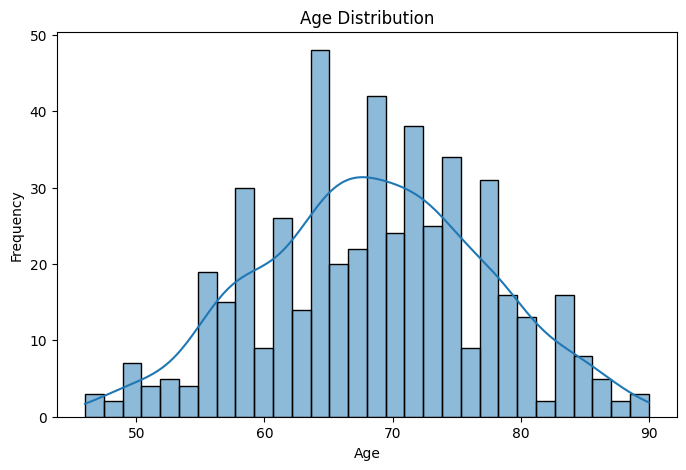

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(pitt['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [39]:
pitt['age'].describe()

count    496.000000
mean      68.411290
std        8.773939
min       46.000000
25%       62.750000
50%       68.000000
75%       74.000000
max       90.000000
Name: age, dtype: float64

In [40]:
pitt['sex'].value_counts()

sex
F    322
M    174
Name: count, dtype: int64

In [41]:
pitt['label'].value_counts()

label
1    253
0    243
Name: count, dtype: int64

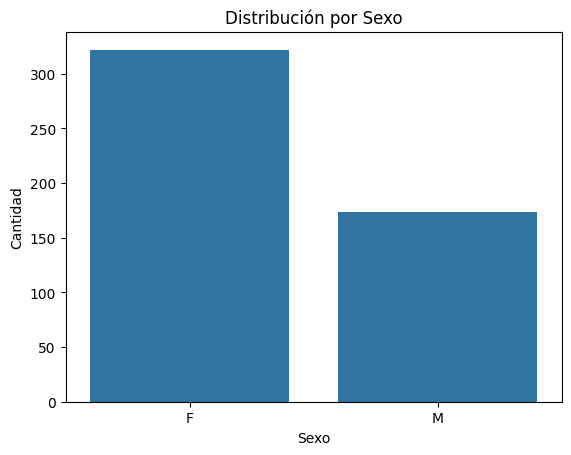

In [42]:
sns.countplot(data=pitt, x='sex')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()


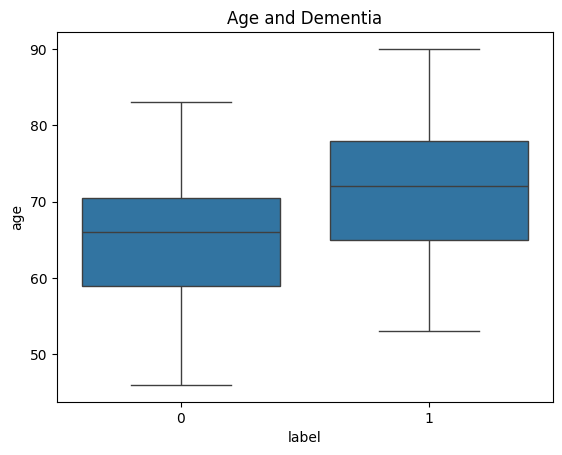

In [43]:
sns.boxplot(data=pitt, x='label', y='age')
plt.title('Age and Dementia')
plt.show()


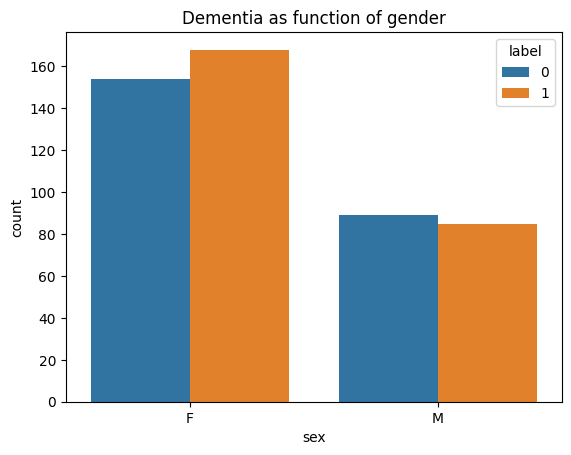

In [44]:
sns.countplot(data=pitt, x='sex', hue='label')
plt.title('Dementia as function of gender')
plt.show()
